In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset

In [2]:
data = pd.read_csv('WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Check outlier

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [4]:
n_data = data.dropna()

Data visualization

Feature Distributions

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6836\1931768235.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  n_data.drop(columns=['Id']).hist(ax=fig.gca(), bins=30, edgecolor='black', grid=False)


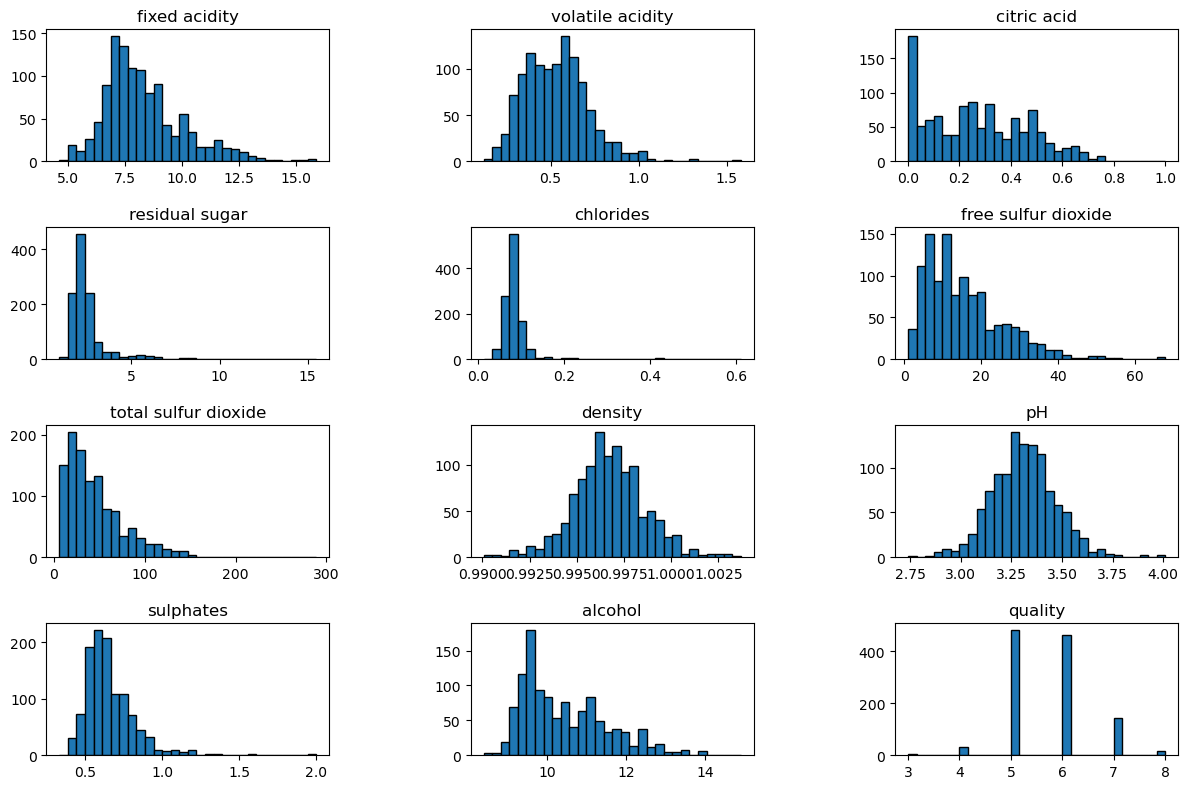

In [5]:
# Create histograms with improved layout
fig = plt.figure(figsize=(12, 8))

# Plot histograms for each numerical feature
n_data.drop(columns=['Id']).hist(ax=fig.gca(), bins=30, edgecolor='black', grid=False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show plot
plt.show()

Correlation Heatmap

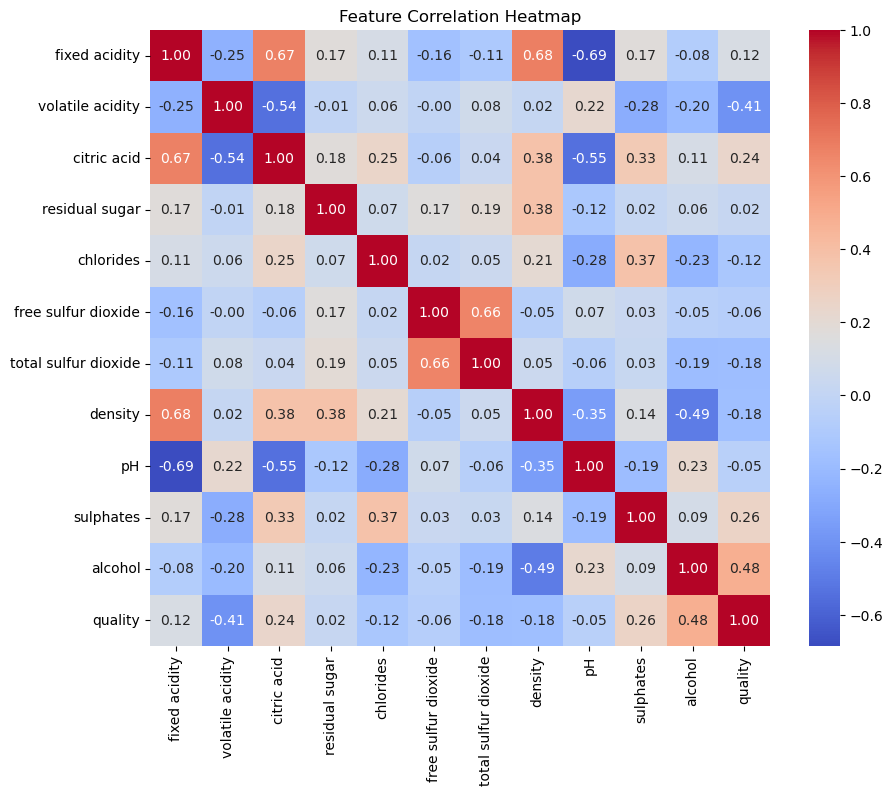

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(n_data.drop(columns=['Id']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

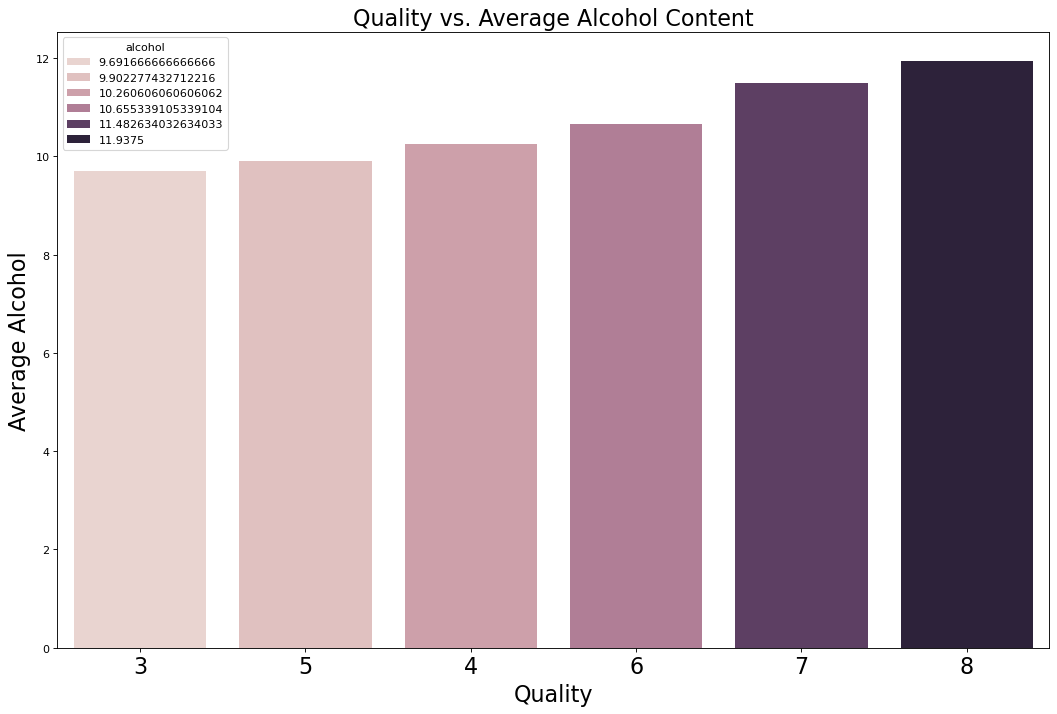

In [7]:
groups = n_data[['quality', 'alcohol']]
grouped_data = groups.groupby('quality')['alcohol'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average Alcohol Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average Alcohol', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

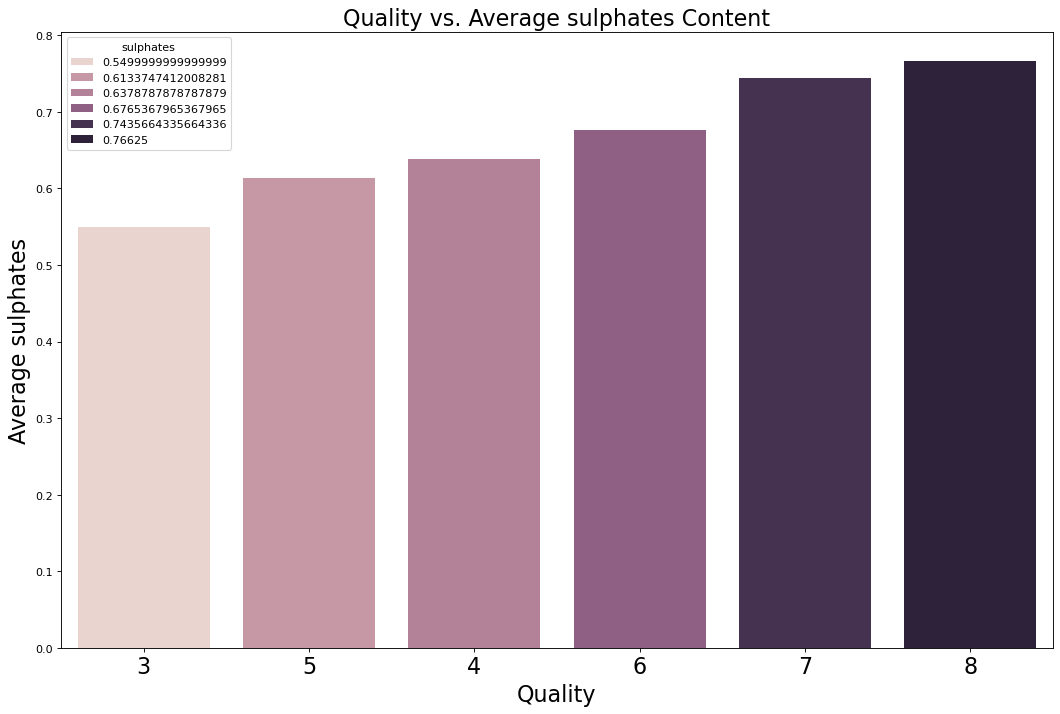

In [8]:
groups = n_data[['quality', 'sulphates']]
grouped_data = groups.groupby('quality')['sulphates'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average sulphates Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average sulphates', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

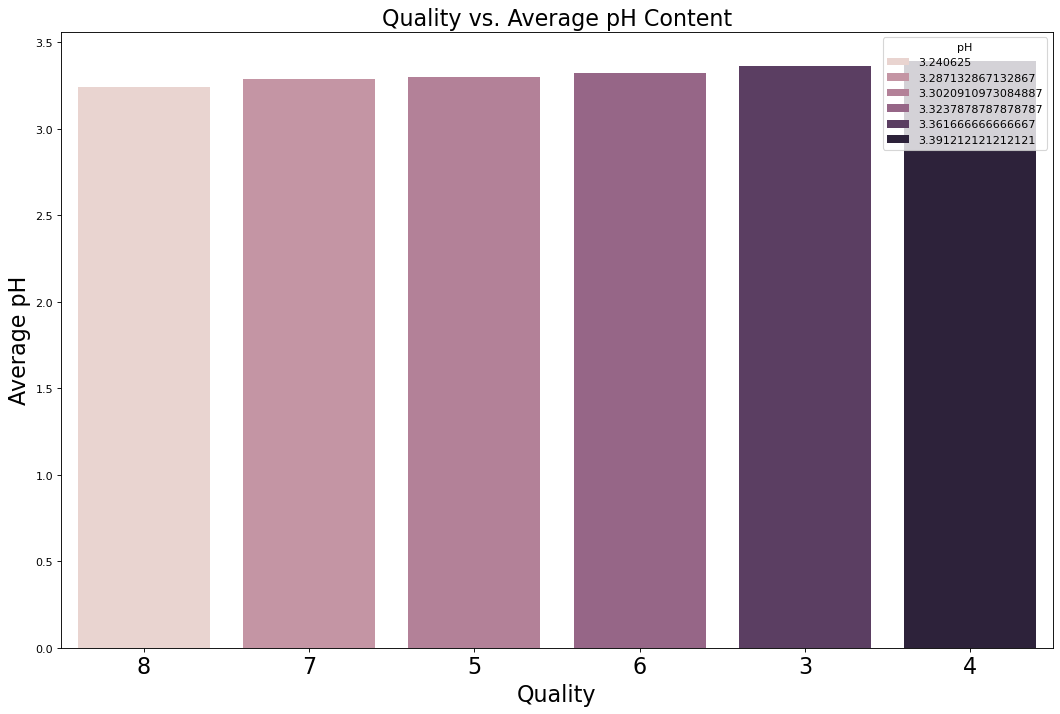

In [9]:
groups = n_data[['quality', 'pH']]
grouped_data = groups.groupby('quality')['pH'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average pH Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average pH', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

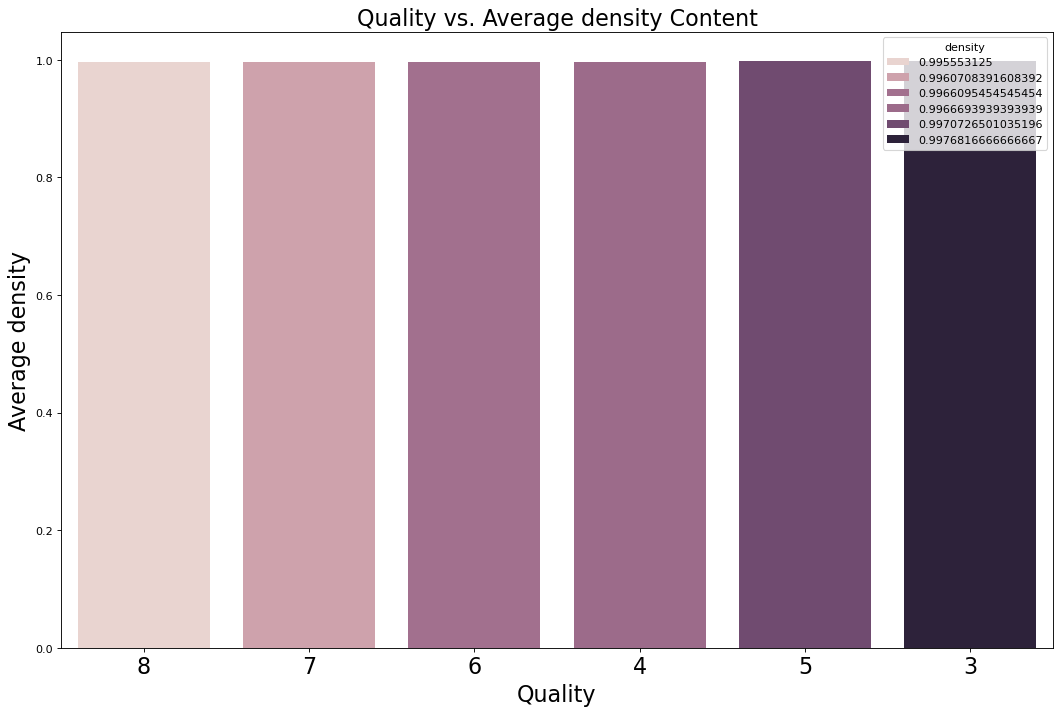

In [10]:
groups = n_data[['quality', 'density']]
grouped_data = groups.groupby('quality')['density'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average density Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average density', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

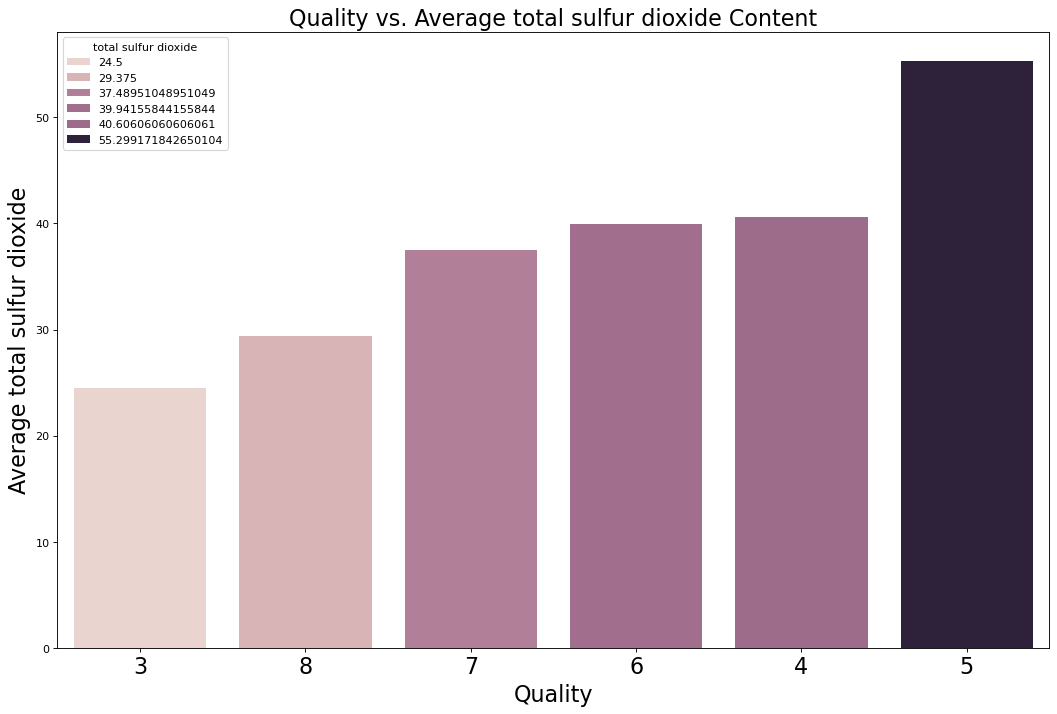

In [11]:
groups = n_data[['quality', 'total sulfur dioxide']]
grouped_data = groups.groupby('quality')['total sulfur dioxide'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average total sulfur dioxide Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average total sulfur dioxide', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

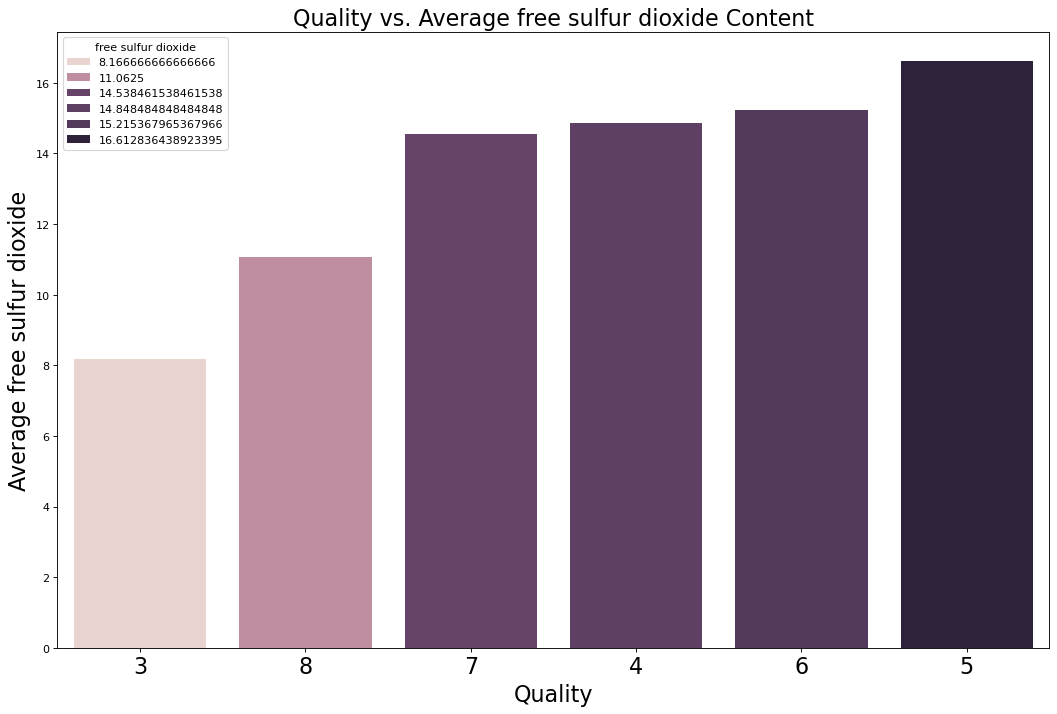

In [12]:
groups = n_data[['quality', 'free sulfur dioxide']]
grouped_data = groups.groupby('quality')['free sulfur dioxide'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average free sulfur dioxide Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average free sulfur dioxide', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

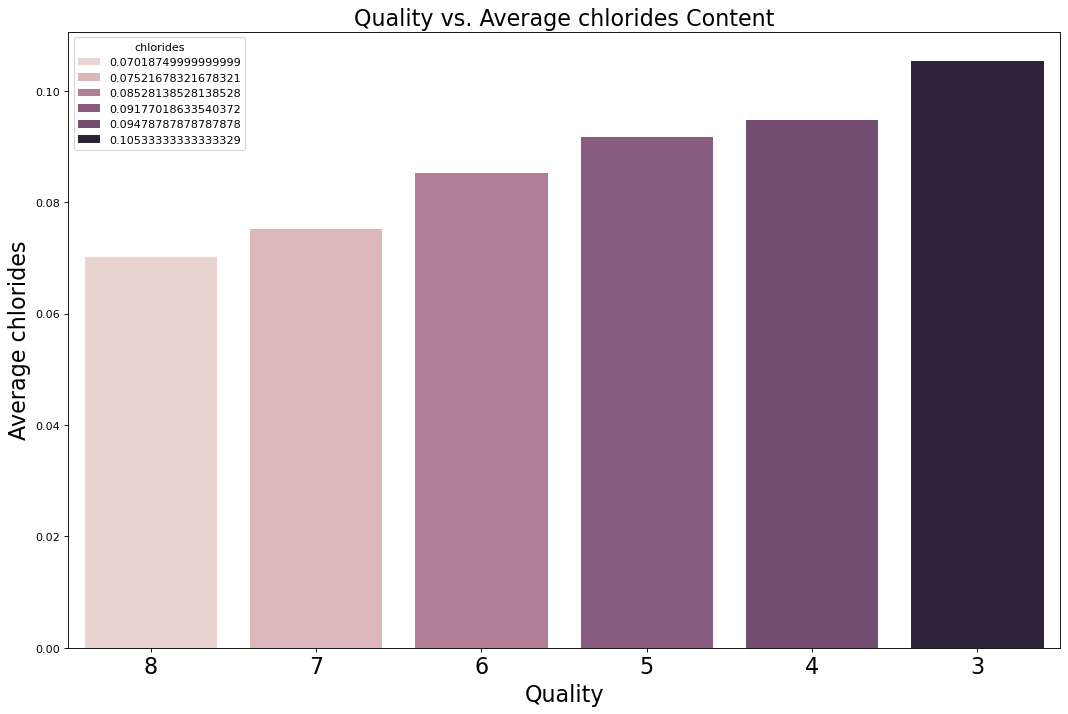

In [13]:
groups = n_data[['quality', 'chlorides']]
grouped_data = groups.groupby('quality')['chlorides'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average chlorides Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average chlorides', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

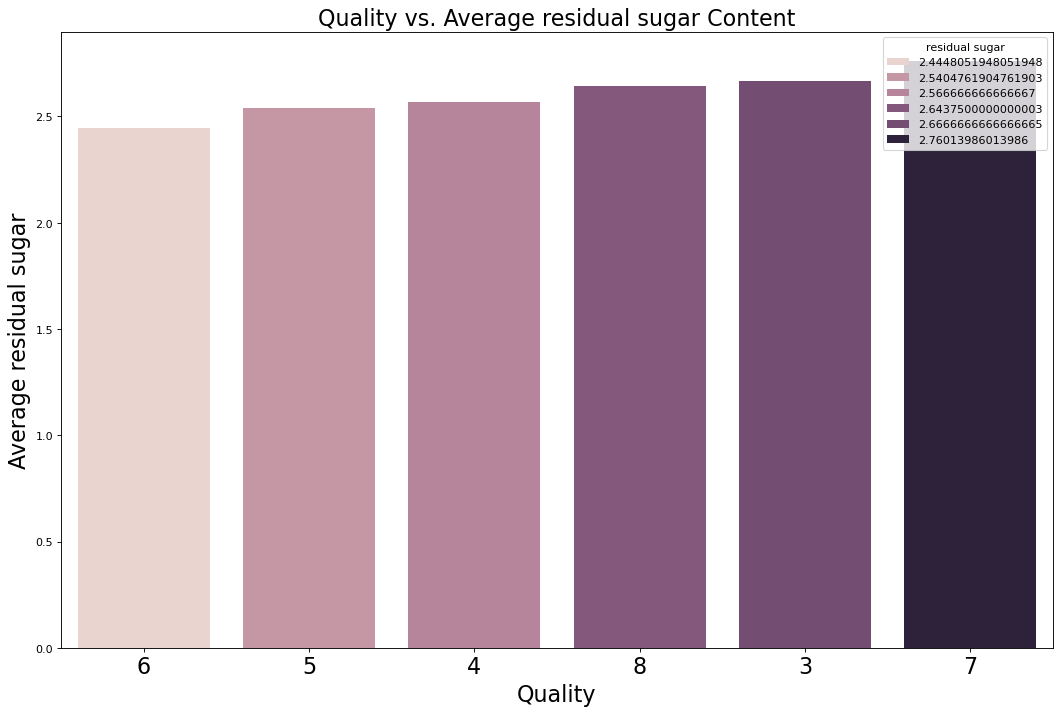

In [14]:
groups = n_data[['quality', 'residual sugar']]
grouped_data = groups.groupby('quality')['residual sugar'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average residual sugar Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average residual sugar', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

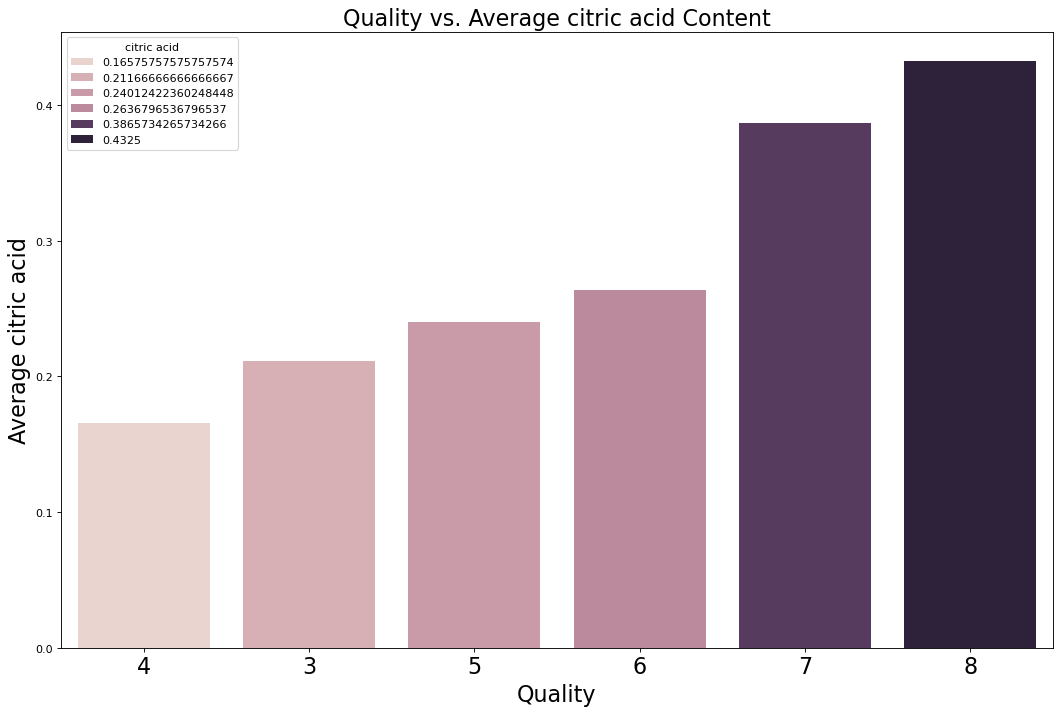

In [15]:
groups = n_data[['quality', 'citric acid']]
grouped_data = groups.groupby('quality')['citric acid'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average citric acid Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average citric acid', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

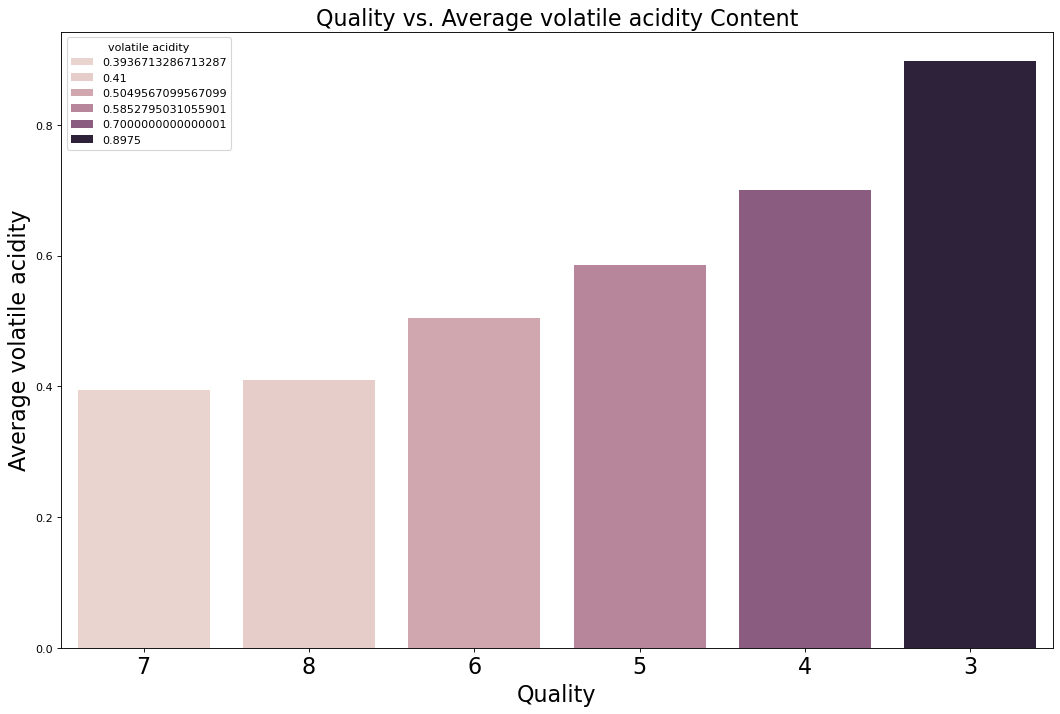

In [16]:
groups = n_data[['quality', 'volatile acidity']]
grouped_data = groups.groupby('quality')['volatile acidity'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average volatile acidity Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average volatile acidity', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

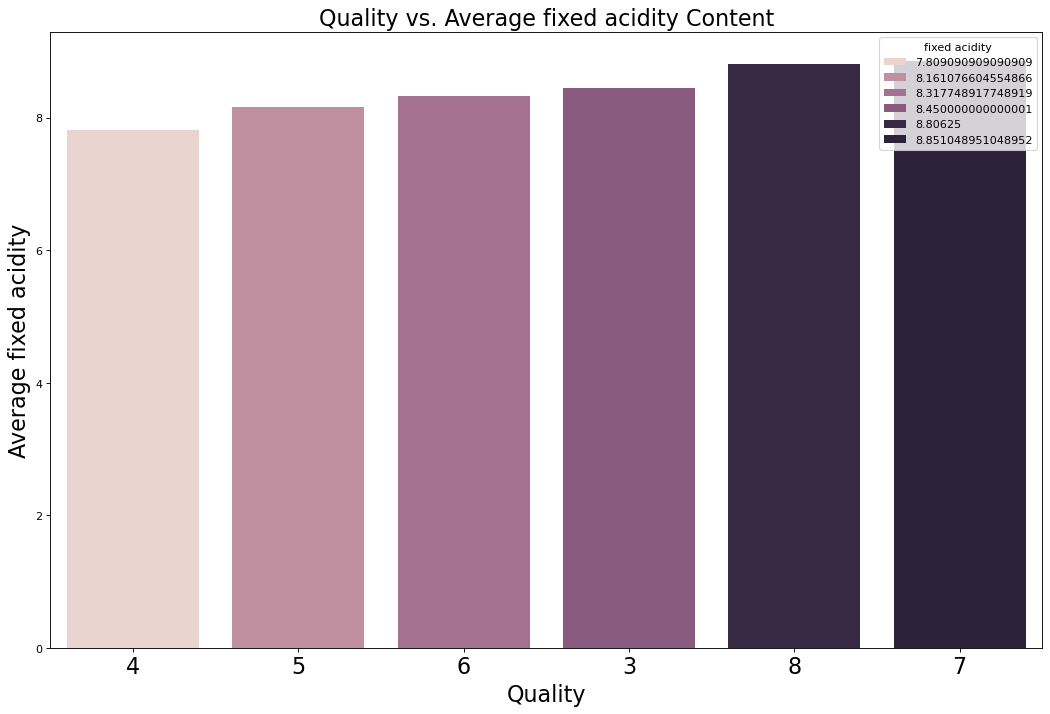

In [17]:
groups = n_data[['quality', 'fixed acidity']]
grouped_data = groups.groupby('quality')['fixed acidity'].mean().sort_values()


fig, ax = plt.subplots(figsize=(16,10), dpi=80)

sns.barplot(x=grouped_data.index, y=grouped_data.values,hue=grouped_data, order=grouped_data.index)
ax.set_title("Quality vs. Average fixed acidity Content", size=20)
ax.set_xlabel('Quality', size=20)
ax.set_ylabel('Average fixed acidity', size=20)
ax.set_xticks(ticks=range(len(grouped_data)),labels=grouped_data.index, size=20)

plt.show()

Separate the input and output

In [18]:
x= n_data.drop(columns=['quality'])
y= n_data['quality']

Count the dataset

In [19]:
y.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Equalize the dataset

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x,y)
y.value_counts()

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

Split data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Normalize data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Training the data

In [23]:
from sklearn.tree import DecisionTreeClassifier
dcs = DecisionTreeClassifier()
dcs.fit(x_train,y_train)

DecisionTreeClassifier()

Testing phase

In [24]:
from sklearn.metrics import accuracy_score, precision_score

prediction = dcs.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction, average='weighted')  

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 79.48%
Precision: 79.54%


Create the model

In [25]:
# joblib.dump(dcs, "decision_tree_model.joblib")
# loaded_model = joblib.load("decision_tree_model.joblib")
# loaded_model = loaded_model.predict(x_test)

In [26]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import graphviz
# import joblib

# # Assume dcs is your trained DecisionTreeClassifier model
# # And x_train is your training data used to fit dcs

# # Export the decision tree to a .dot file
# export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=x_train.columns)

# # Read and render the .dot file (optional, for visualization only)
# with open('tree.dot') as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

# # Save the model properly
# # joblib.dump(dcs, "decision_tree_model.joblib")
